### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Descriptive stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insight and observation:
- As you can glucose, bloodpressure,skinthickness,bmi,insulin having zero at min so we need to change that values beacause that does't make any sense. so we can replace it with either with mean or median.

In [5]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


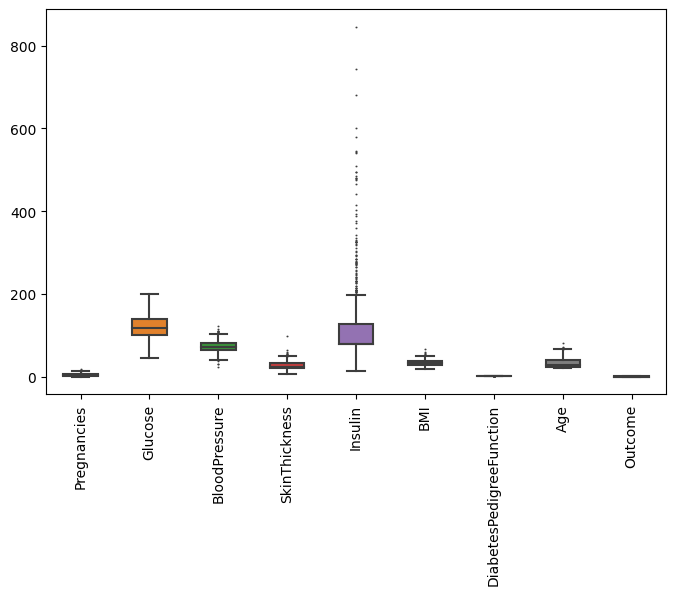

In [7]:
# Visualization
plt.figure(figsize=(8,5))
sns.boxplot(data=df,fliersize=0.5,width=0.5)
plt.xticks(rotation=90)
plt.show()

### Insight and Observation 
- As you can see boxplot you will find outliers are there so we need to deal with oulier.

In [8]:
# segregate the feature into independent and dependent
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
# Training testing and splitting
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
# standardization for removing outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# model trainning with cv and hyperparameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [13]:
parameters = {
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}

In [14]:
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameters,cv=4,scoring='accuracy')

In [15]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [16]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [17]:
y_pred = clf.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [19]:
print(accuracy_score(y_test,y_pred))

0.6848249027237354


In [20]:
print(f1_score(y_test,y_pred))

0.4


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       332
           1       0.61      0.30      0.40       182

    accuracy                           0.68       514
   macro avg       0.66      0.60      0.59       514
weighted avg       0.67      0.68      0.65       514



In [55]:
# predicting 
# values_for_prediction = scaler.transform([[4,103,60,33,192,24,0.966,33]])
values_for_prediction = scaler.transform([[10,108,66,0,0,32.4,0.272,42]])

In [56]:
outcome = clf.predict(values_for_prediction)
if outcome[0] == 1:
    print('Patient has diabetes issues')
else:
    print('Patient is safe and healthy')

Patient has diabetes issues
